# Hands on: Data Exploration
## 1. Summarization
Load the data set `carIns final`. It already has the imputation of missing values. 

a) Obtain the number of cars by the bodyStyle.

In [2]:
# Load R data
import pyreadr

# Load .RData file
result = pyreadr.read_r('../data/02_dataquality/carIns_final.Rdata')

# Extract the dataframe from the result
df = result['carIns_final']
df.head()

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,...,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
group = df.groupby('bodyStyle')['bodyStyle'].agg('count')
group

bodyStyle
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: bodyStyle, dtype: int64

b) Obtain the number of cars by bodyStyle and fuelType.

In [14]:
group = df.groupby(['bodyStyle', 'fuelType'])['bodyStyle'].agg('count')

group

bodyStyle    fuelType
convertible  diesel       0
             gas          6
hardtop      diesel       1
             gas          7
hatchback    diesel       1
             gas         69
sedan        diesel      15
             gas         81
wagon        diesel       3
             gas         22
Name: bodyStyle, dtype: int64

c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.

In [26]:
group = df.groupby('bodyStyle')['cityMpg'].agg(['mean','std'])
group.sort_values(ascending = True,by=['mean','std'])

,mean,std
bodyStyle,,
convertible,20.500000,3.391165
hardtop,21.625000,5.423165
wagon,24.040000,4.217819
sedan,25.322917,6.599035
hatchback,26.314286,7.169870


d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard 
deviation, the median and the inter-quartile range.

In [27]:
import numpy as np
# Lest define a function that calculate the IQR range
def iqr_func(x):
    """ This function calculate the iqr range given a data point value

    Args:
        x (int, float): Data Point value

    Returns:
        int, float: IQR
    """
    q3, q1 = np.percentile(x, [75, 25])
    return q3 - q1

In [31]:
group = df.groupby('bodyStyle')[['cityMpg','highwayMpg']].agg(['mean','std','median',iqr_func])
group

cityMpg                           highwayMpg                   \
                  mean       std median iqr_func       mean       std median   
bodyStyle                                                                      
convertible  20.500000  3.391165   21.0     5.25  26.000000  4.289522   27.0   
hardtop      21.625000  5.423165   23.0     7.00  27.250000  6.088631   27.5   
hatchback    26.314286  7.169870   26.0    12.00  32.171429  7.044314   31.5   
sedan        25.322917  6.599035   25.0    11.25  30.833333  7.174027   30.5   
wagon        24.040000  4.217819   24.0     5.00  28.720000  4.703899   29.0   

                      
            iqr_func  
bodyStyle             
convertible     3.00  
hardtop         5.00  
hatchback      11.75  
sedan          11.25  
wagon           7.00

## Visualization

e) Show the relationship between the attributes cityMpg and highwayMpg


In [34]:
# Lets see types 
df.info()
# Both data type are int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symb              205 non-null    int32   
 1   normLoss          205 non-null    int32   
 2   make              205 non-null    category
 3   fuelType          205 non-null    category
 4   aspiration        205 non-null    category
 5   nDoors            205 non-null    category
 6   bodyStyle         205 non-null    category
 7   driveWheels       205 non-null    category
 8   engineLocation    205 non-null    category
 9   wheelBase         205 non-null    float64 
 10  length            205 non-null    float64 
 11  width             205 non-null    float64 
 12  height            205 non-null    float64 
 13  curbWeight        205 non-null    int32   
 14  engineType        205 non-null    category
 15  nrCylinds         205 non-null    category
 16  engineSize        205 non-

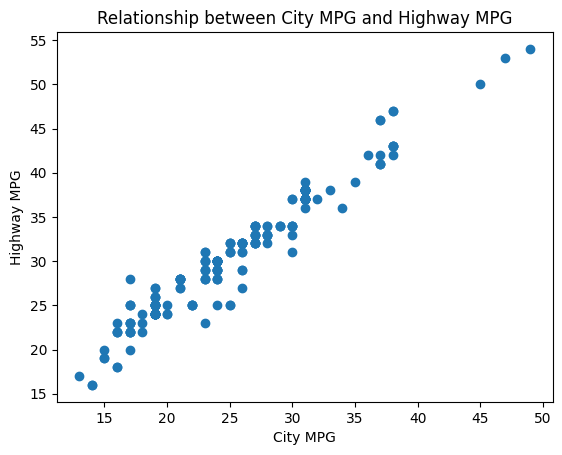

In [44]:
import matplotlib.pyplot as plt 
plt.scatter(df['cityMpg'], df['highwayMpg'])
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Relationship between City MPG and Highway MPG')
plt.show()

As we can see, it seems to be a lineal relationship between two variables. Lets defined it.


In [51]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(df[['cityMpg']],df['highwayMpg'])

# get slope
slope = reg_model.coef_[0]
intercep = reg_model.intercept_

print(f"Linear relation: {slope}*x + {intercep}")
print(f"The pearson correlation:  {df['cityMpg'].corr(df['highwayMpg'])}")

Linear relation: 1.0224568127472236*x + 4.965357454130995
The pearson correlation:  0.9713370423425046


As we can see there is a higher pearson correlation `0.97` that shows there is in fact a relationship between two variables

f) Show the distribution of cars by bodyStyle.

Text(0.5, 1.0, 'Distribution of Cars by Body Style')

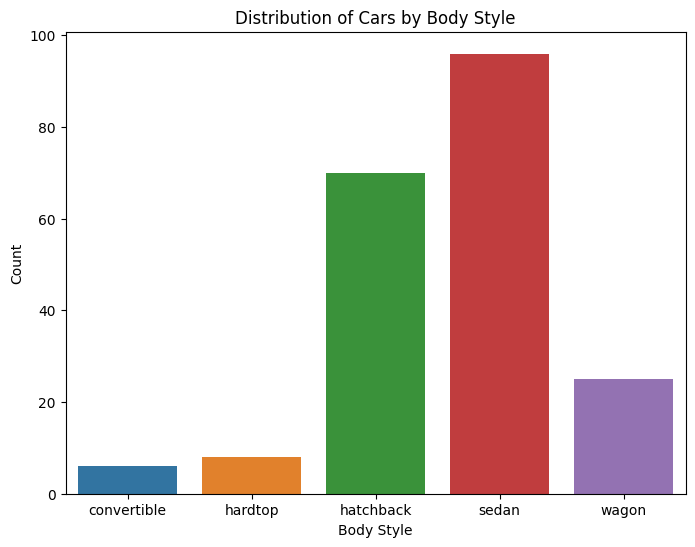

In [53]:
import seaborn as sns
# Create a countplot of the distribution by bodyStyle
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bodyStyle')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars by Body Style')

g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

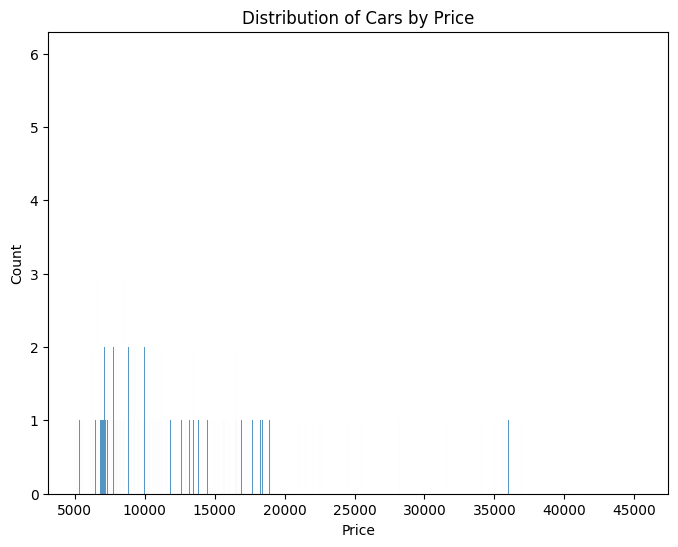

In [55]:
import seaborn as sns
# Create a countplot of the distribution by bodyStyle
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins = 5000)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Cars by Price')
plt.show()

In this graph we can see how the prices goes grom 5000 to 20000 mostly

h) Add the information of the density estimation to the previous graph

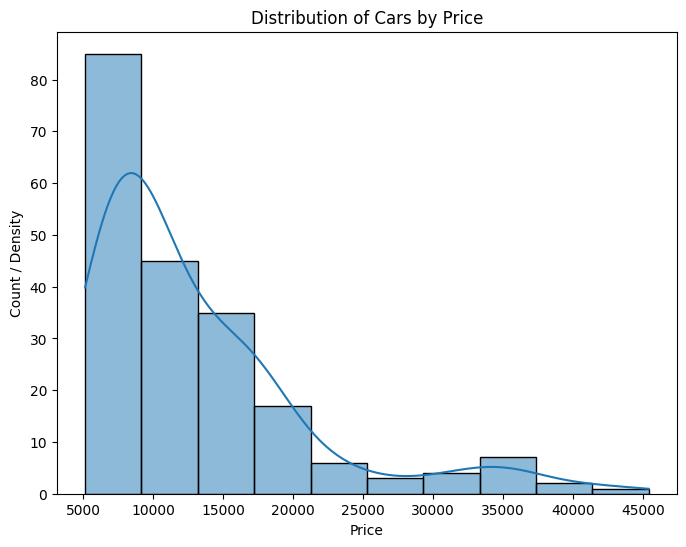

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', kde=True, bins=10)
plt.xlabel('Price')
plt.ylabel('Count / Density')
plt.title('Distribution of Cars by Price')
plt.show()

With the density probability curve we can see the peaks between 5000 and 10000+

i) Check (visually) if it is plausible to consider that price follows a normal distribution.
We can compare the give curve with a normal distribution curve. And you can tell it is a little bit similar, but lets see more deeply

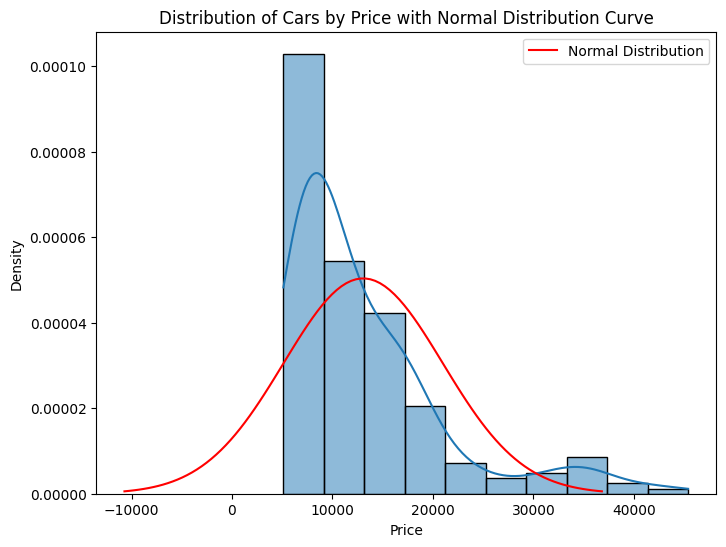

In [57]:
import scipy.stats as stats

# Create a histogram with density estimation
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', kde=True, bins=10, stat='density')

# Overlay the normal distribution curve
mu, sigma = np.mean(df['price']), np.std(df['price'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='Normal Distribution')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Cars by Price with Normal Distribution Curve')
plt.legend()
plt.show()

We are going in the right track, but lets talk in numbers using the Shapiro-wilk test for normality

In [58]:
# Perform the Shapiro-Wilk test for normality
p_value = stats.shapiro(df['price']).pvalue

# Check if the p-value is below the significance level (e.g., 0.05)
alpha = 0.05
is_normal = p_value > alpha

# Print the result
if is_normal:
    print("The price column follows a normal distribution.")
else:
    print("The price column does not follow a normal distribution.")

The price column does not follow a normal distribution.


Given the previous test although visually it seems like a normal distribution, the shapiro test said it is not. 
We need to understand the context of the data to make a decision about it.


j) Show the distribution of price by make attribute. Suggestion: use boxplots

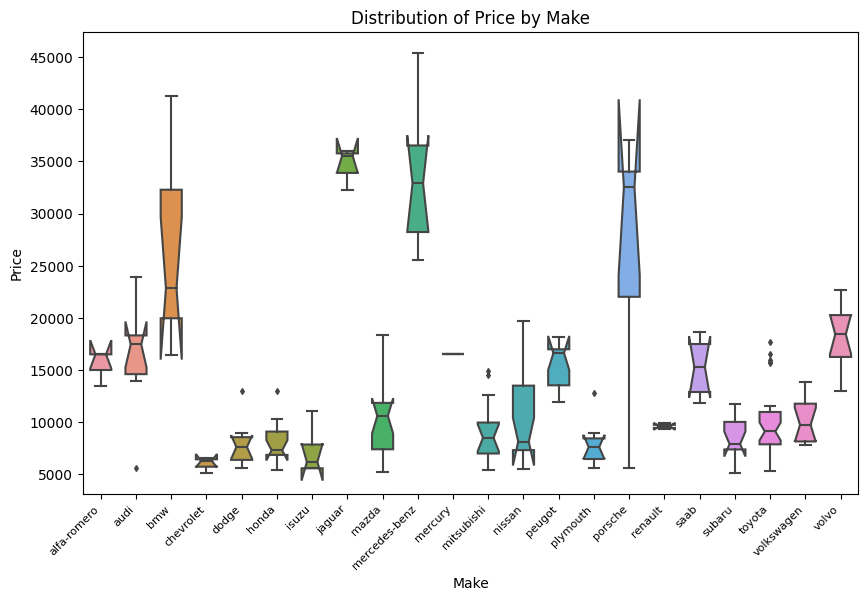

In [68]:
# Set a wider figure size
plt.figure(figsize=(10, 6))

# Create a boxplot of the distribution of price by make
ax = sns.boxplot(data=df, x='make', y='price', width=0.6, linewidth=1.5, notch=True, fliersize=3)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Distribution of Price by Make')

# Add extra spacing between boxes
ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=8)
plt.subplots_adjust(hspace=0.4)


# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

k)  Show the distribution of price by nDoors attribute. Suggestion: use histograms

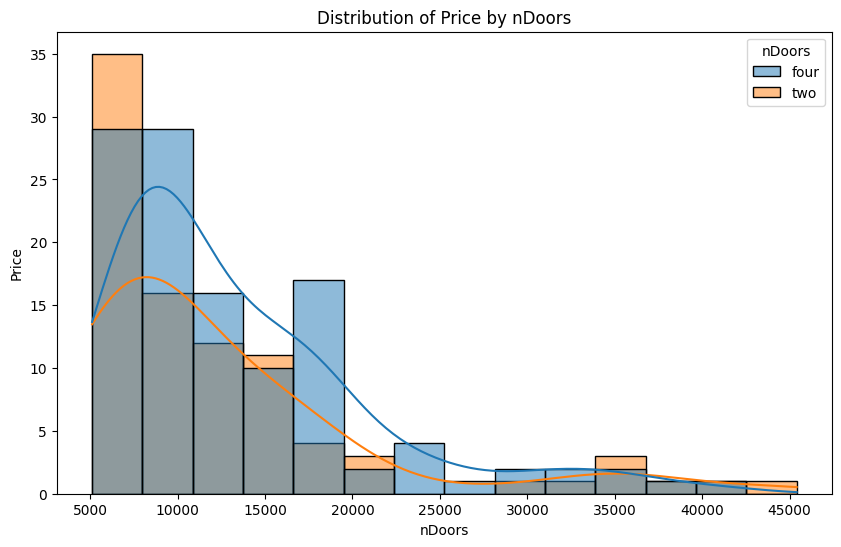

In [75]:
# Set a wider figure size
plt.figure(figsize=(10, 6))

# Create a boxplot of the distribution of price by make
ax = sns.histplot(data = df, x = 'price', hue = 'nDoors', kde = True)
plt.xlabel('nDoors')
plt.ylabel('Price')
plt.title('Distribution of Price by nDoors')
plt.show()

I) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

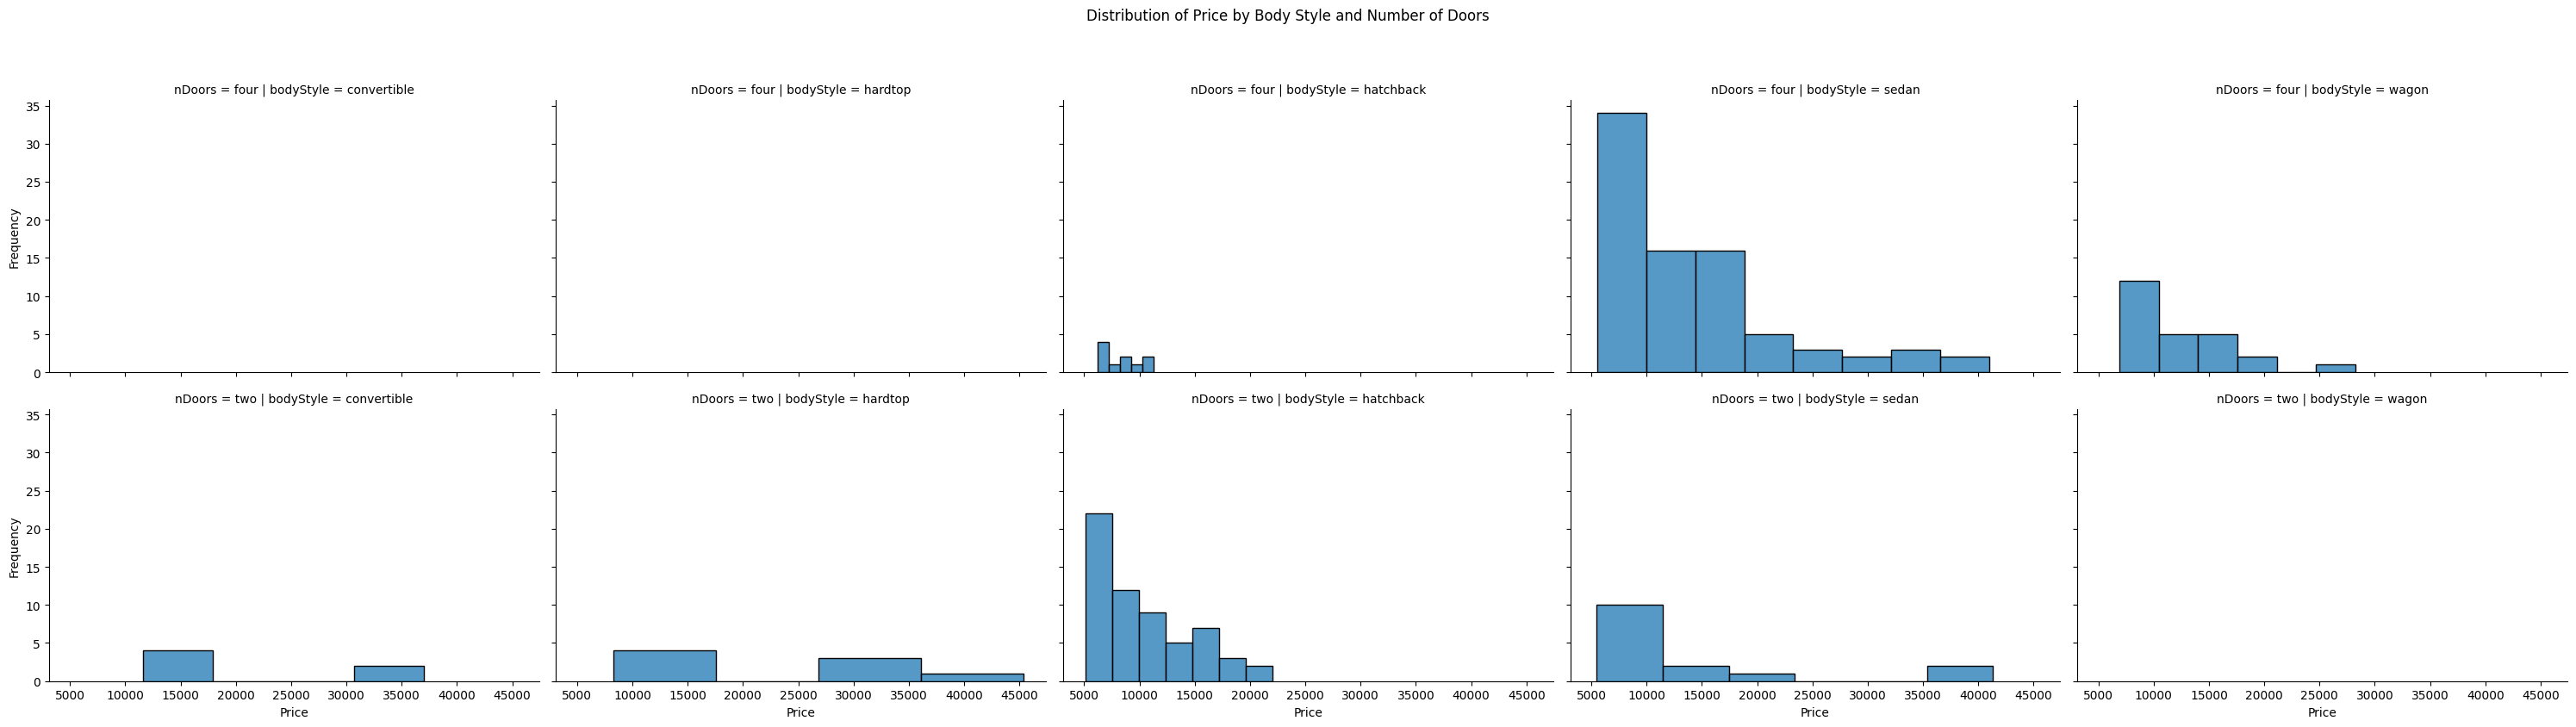

In [77]:
# Create a facet grid of histograms
g = sns.FacetGrid(df, col='bodyStyle', row='nDoors', height=4, aspect=1.5)
g.map(sns.histplot, 'price')
g.set_axis_labels('Price', 'Frequency')
g.fig.suptitle('Distribution of Price by Body Style and Number of Doors', y=1.05)
plt.tight_layout()
plt.show()

m) Add the parameter scales="free_y" to the facet function in the previous graph.

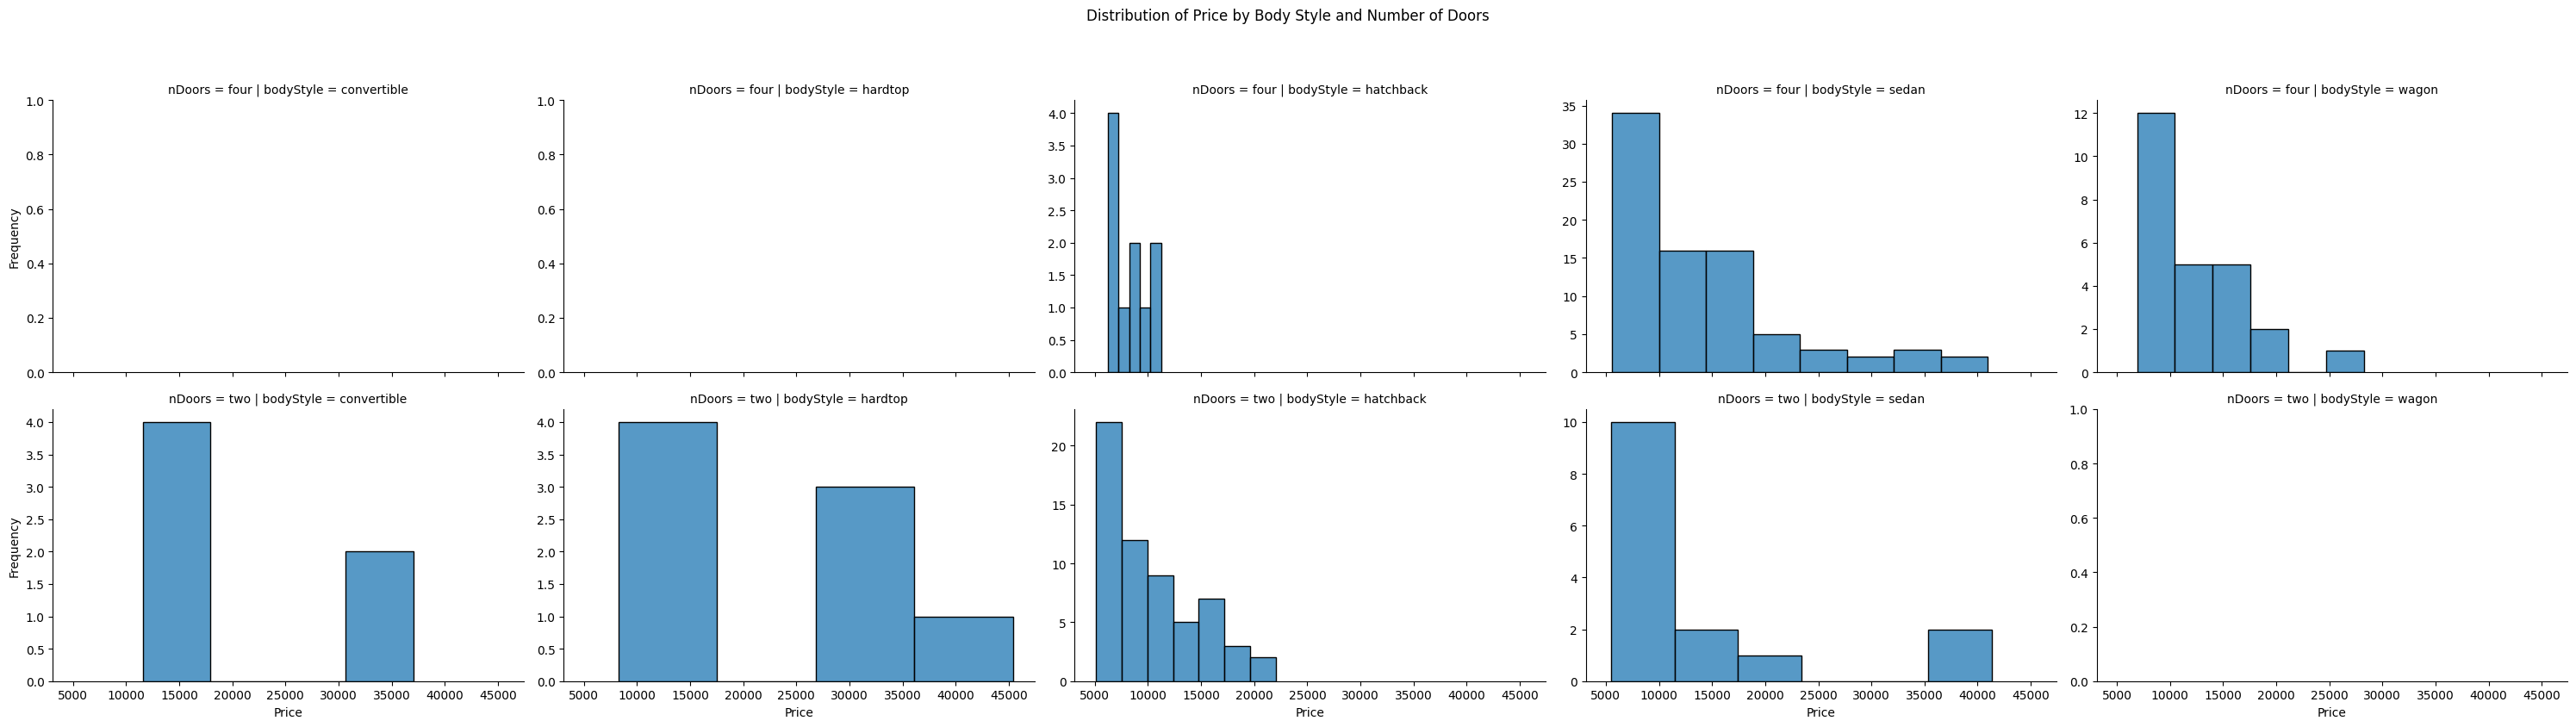

In [80]:
# Create a facet grid of histograms with free y-axis scales
g = sns.FacetGrid(df, col='bodyStyle', row='nDoors', height=4, aspect=1.5, sharey=False)
g.map(sns.histplot, 'price')
g.set_axis_labels('Price', 'Frequency')
g.fig.suptitle('Distribution of Price by Body Style and Number of Doors', y=1.05)
plt.tight_layout()
plt.show()